In [127]:
import kagglehub
import os
import pandas as pd
import sys
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import norm

# Download latest version
path = kagglehub.dataset_download("whigmalwhim/steam-releases")

print("Path to dataset files:", path)

caminho = os.path.join(path, 'game_data_all.csv')
df = pd.read_csv(caminho)
print(df.head())

Using Colab cache for faster access to the 'steam-releases' dataset.
Path to dataset files: /kaggle/input/steam-releases
   Unnamed: 0                              game           link     release  \
0           0                       Pizza Tower  /app/2231450/  2023-01-26   
1           1                   Resident Evil 4  /app/2050650/  2023-03-24   
2           2  The Murder of Sonic the Hedgehog  /app/2324650/  2023-03-31   
3           3                Pineapple on pizza  /app/2263010/  2023-03-28   
4           4                        Hi-Fi RUSH  /app/1817230/  2023-01-25   

   peak_players  positive_reviews  negative_reviews  total_reviews  rating  \
0          4529             19807               227          20034   96.39   
1        168191             61752              1616          63368   95.75   
2         15543             12643               213          12856   95.54   
3          1415             11717               209          11926   95.39   
4          6132     

In [128]:
df = df[(df['link'].notnull()) & (df['release'].notnull()) & (df['peak_players'].notnull()) & (df['positive_reviews'].notnull()) & (df['negative_reviews'].notnull()) & (df['total_reviews'].notnull()) & (df['rating'].notnull()) & (df['primary_genre'].notnull()) & (df['store_genres'].notnull()) & (df['publisher'].notnull()) & (df['developer'].notnull()) & (df['detected_technologies'].notnull()) & (df['store_asset_mod_time'].notnull()) & (df['review_percentage'].notnull()) & (df['players_right_now'].notnull()) & (df['24_hour_peak'].notnull()) & (df['all_time_peak'].notnull()) & (df['all_time_peak_date'].notnull())]

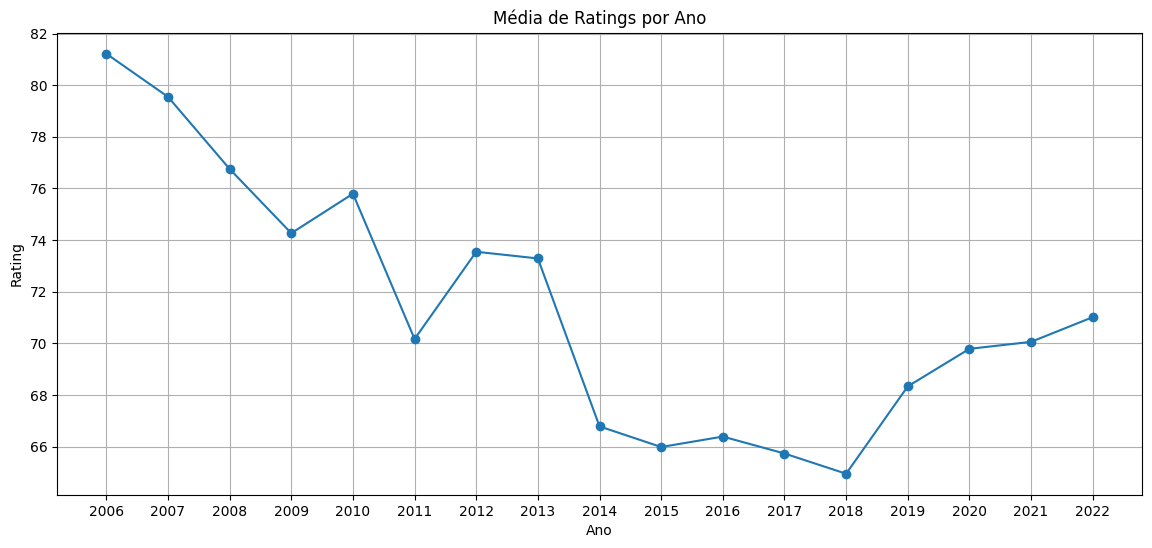

In [129]:
#Rating ao longo dos anos
df["release"] = pd.to_datetime(df["release"], errors = "coerce")
df["year"] = df["release"].dt.year
df["year"] = df["year"].astype(int)
df = df[df['year'] != 2023]

#Media
df_mean_rating = df.groupby("year")["rating"].mean()

plt.figure(figsize=(14, 6))

plt.xticks(df_mean_rating.index) #Força mostrar todos os anos

plt.plot(df_mean_rating.index, df_mean_rating.values, marker="o", label="rating")
plt.xlabel("Ano")
plt.ylabel("Rating")
plt.title("Média de Ratings por Ano")
plt.grid(True)
plt.show()

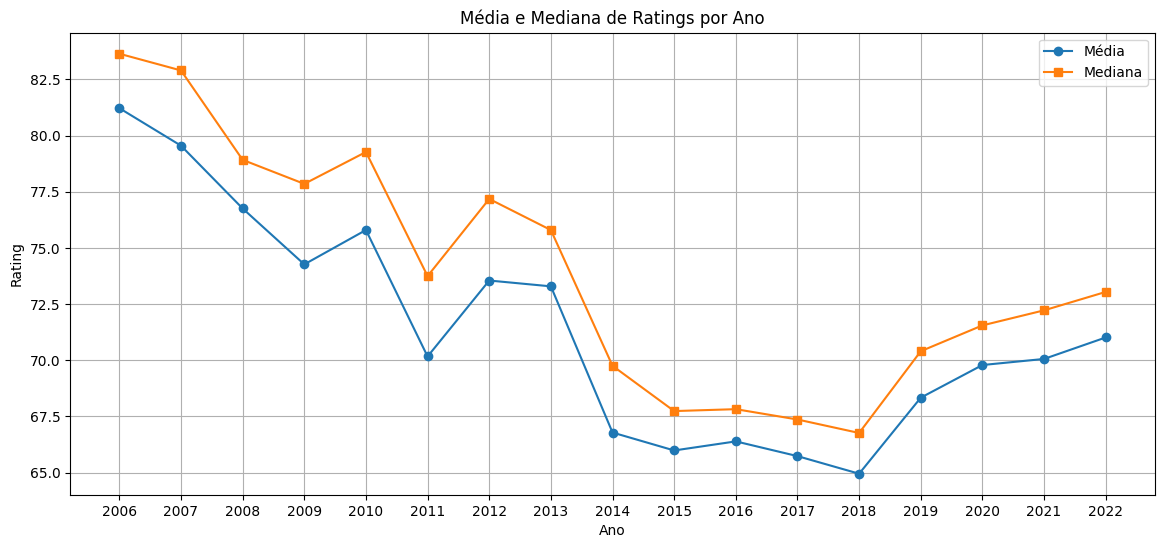

In [130]:
#Media vs Mediana Rating

df_median_rating = df.groupby("year")["rating"].median()
plt.figure(figsize=(14, 6))

plt.xticks(df_median_rating.index) #Força mostrar todos os anos

plt.plot(df_mean_rating.index, df_mean_rating.values, marker="o", label="Média")
plt.plot(df_median_rating.index, df_median_rating.values, marker="s", label="Mediana")
plt.xlabel("Ano")
plt.ylabel("Rating")
plt.title("Média e Mediana de Ratings por Ano")
plt.grid(True)
plt.legend()
plt.show()

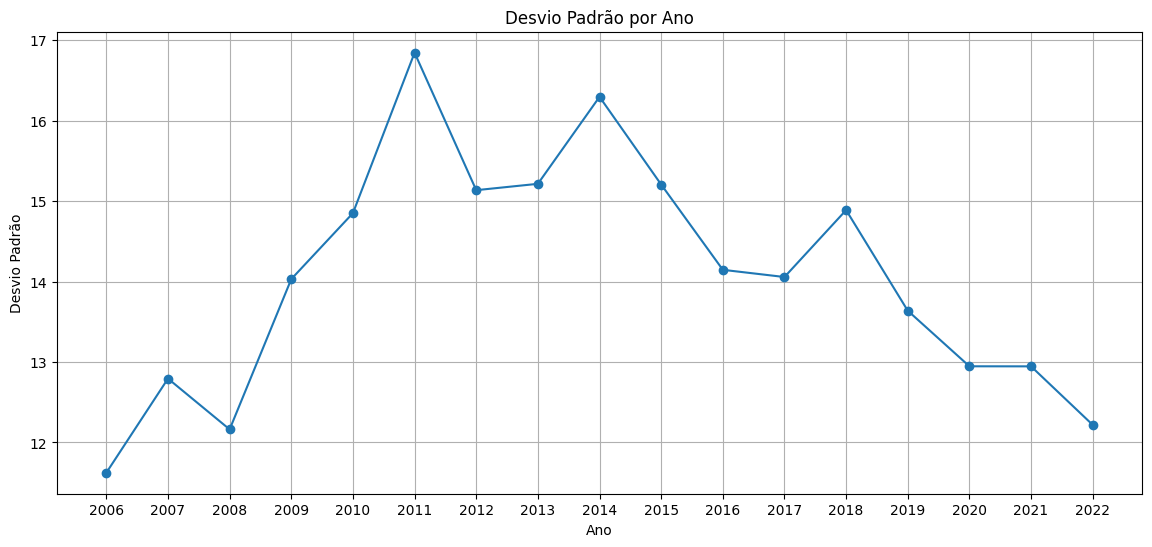

In [131]:
#Desvio Padrão Rating

df_std_rating = df.groupby("year")["rating"].std()
plt.figure(figsize=(14, 6))

plt.xticks(df_std_rating.index) #Força mostrar todos os anos

plt.plot(df_std_rating.index, df_std_rating.values, marker="o", label="Desvio Padrão")
plt.xlabel("Ano")
plt.ylabel("Desvio Padrão")
plt.title("Desvio Padrão por Ano")
plt.grid(True)
plt.show()

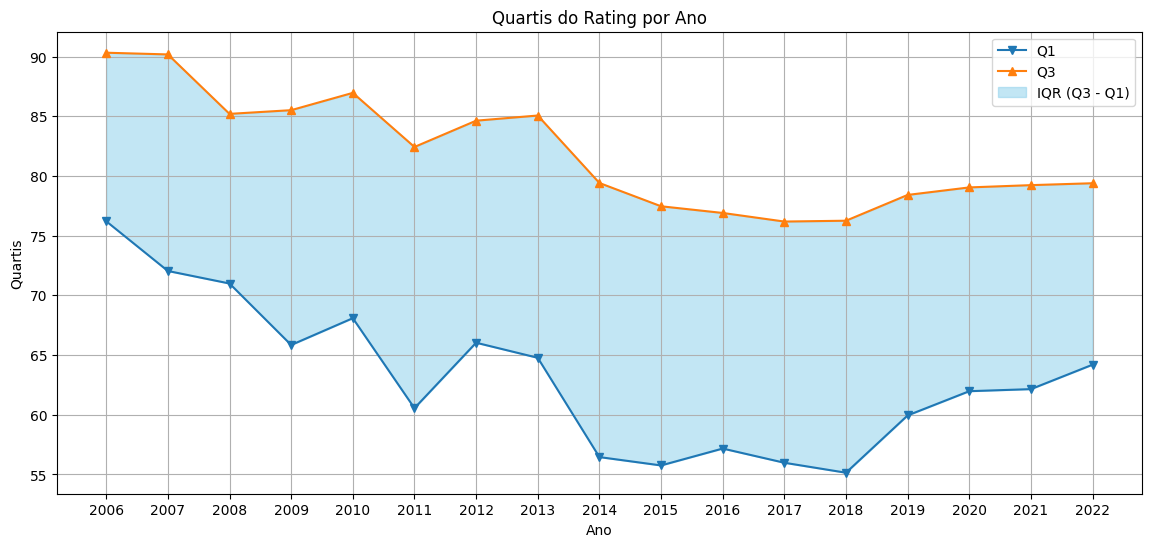

In [132]:
#Quartis Rating
quartis = df.groupby("year")["rating"].quantile([0.25, 0.5, 0.75]).unstack()

quartis.columns = ["Q1", "Q2", "Q3"]
quartis["IQR"] = quartis["Q3"] - quartis["Q1"]

plt.figure(figsize=(14, 6))

plt.plot(quartis.index, quartis["Q1"], marker="v", label="Q1")
plt.plot(quartis.index, quartis["Q3"], marker="^", label="Q3")

plt.fill_between(
    quartis.index,
    quartis["Q1"],
    quartis["Q3"],
    color="skyblue",
    alpha=0.5,
    label="IQR (Q3 - Q1)"
)

plt.xticks(quartis.index)
plt.xlabel("Ano")
plt.ylabel("Quartis")
plt.title("Quartis do Rating por Ano")
plt.grid(True)
plt.legend()
plt.show()

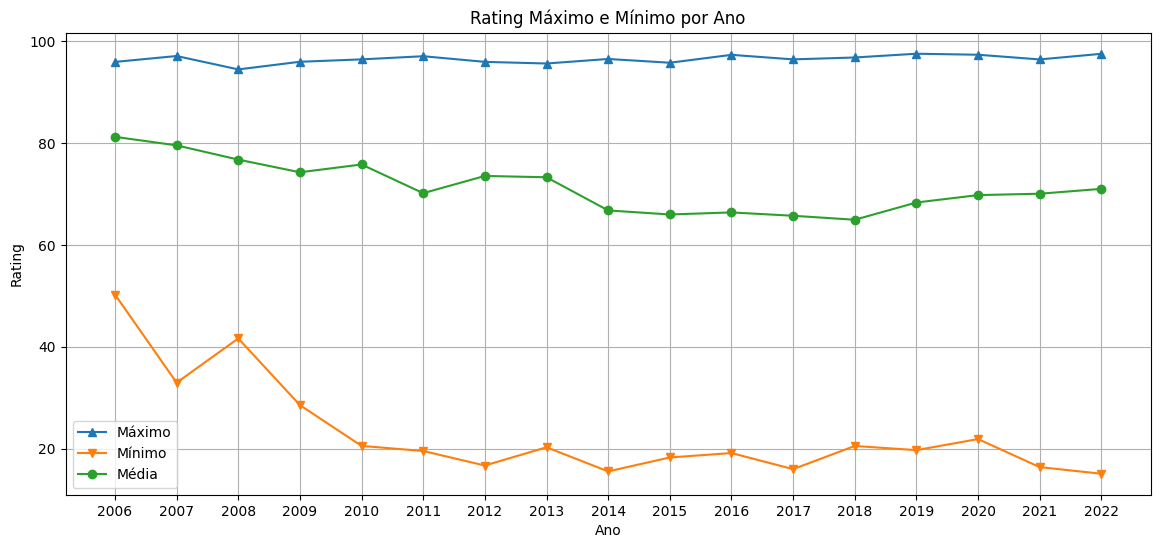

In [133]:
#Rating máximo e mínimo
df_max_rating = df.groupby("year")["rating"].max()
df_min_rating = df.groupby("year")["rating"].min()

plt.figure(figsize=(14, 6))

plt.plot(df_max_rating.index, df_max_rating.values, marker="^", label="Máximo")
plt.plot(df_min_rating.index, df_min_rating.values, marker="v", label="Mínimo")
plt.plot(df_mean_rating.index, df_mean_rating.values, marker="o", label="Média")

plt.xticks(quartis.index)
plt.xlabel("Ano")
plt.ylabel("Rating")
plt.title("Rating Máximo e Mínimo por Ano")
plt.grid(True)
plt.legend()
plt.show()

<Figure size 1600x800 with 0 Axes>

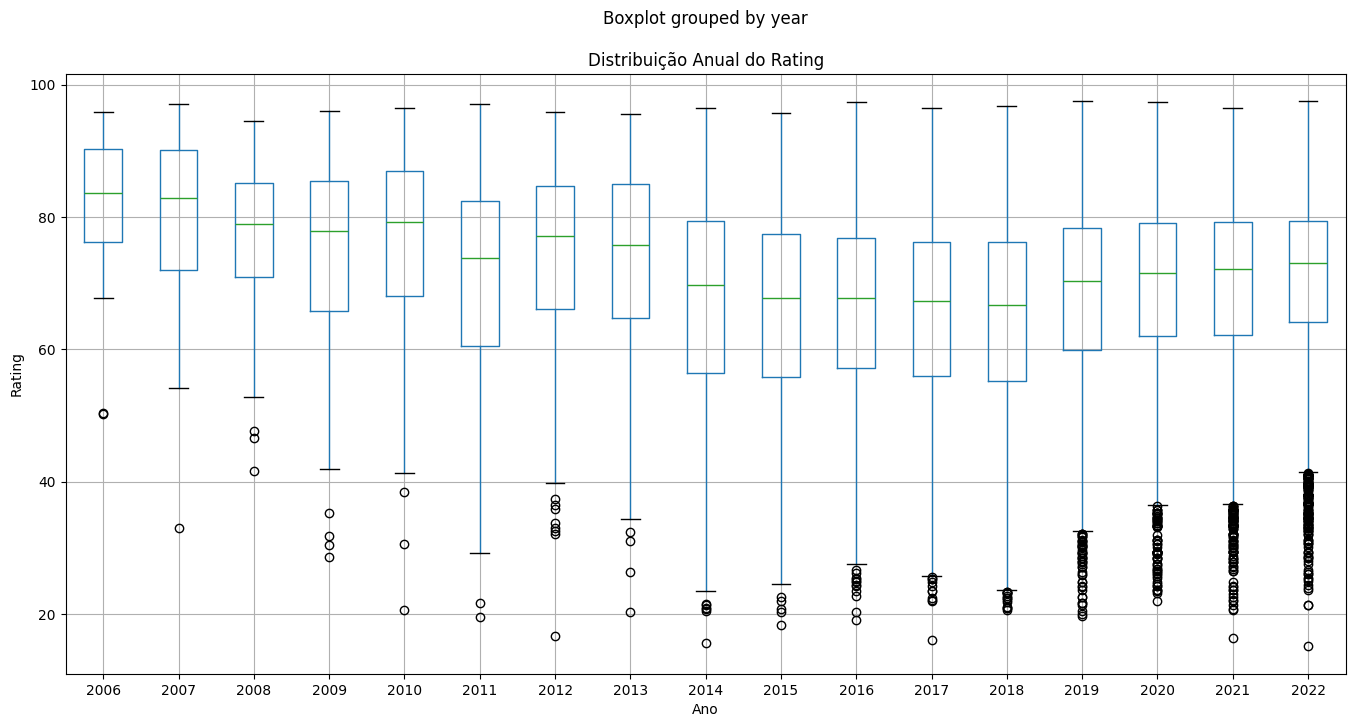

In [134]:
#Boxplots dos ratings

plt.figure(figsize=(16, 8))

df.boxplot(
    column="rating",
    by="year",
    figsize=(16, 8),
    rot=0,
    grid=True,
    patch_artist=False # Para preencher as caixas com cores
)

plt.title("Distribuição Anual do Rating")
plt.xlabel("Ano")
plt.ylabel("Rating")
plt.show()

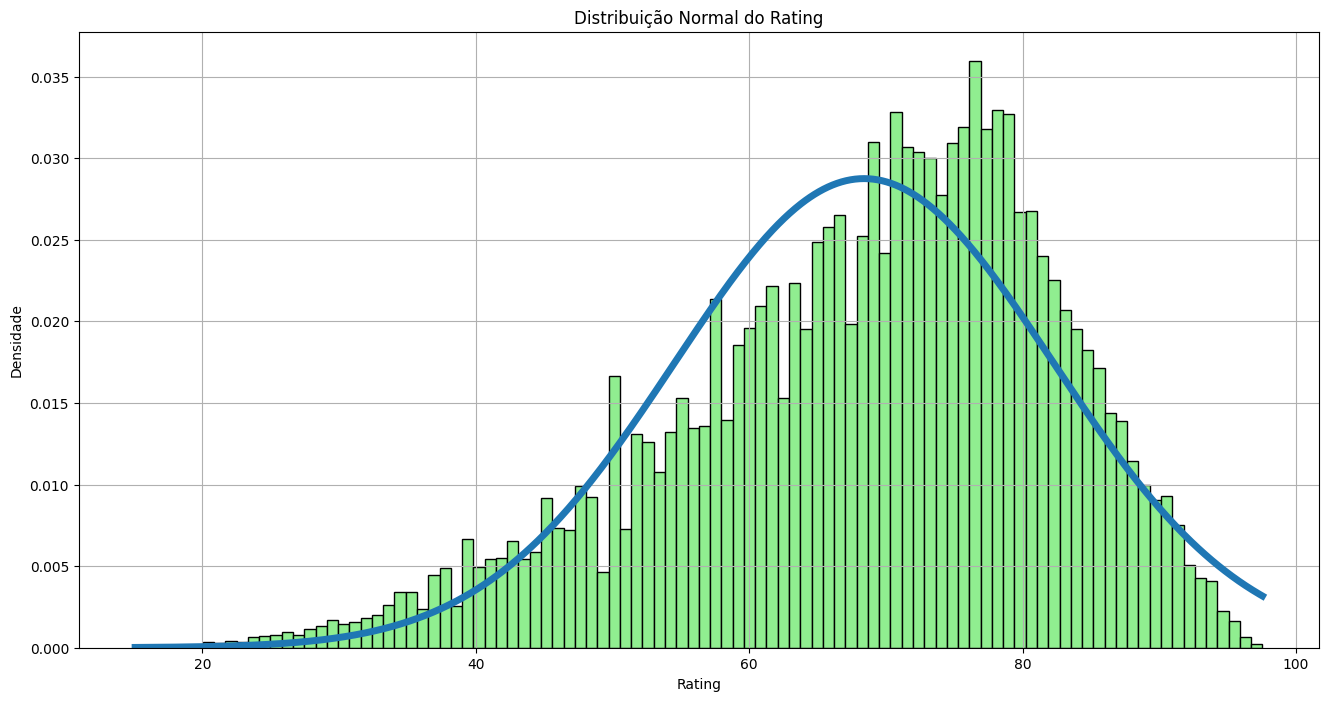

In [135]:
plt.figure(figsize=(16, 8))

# Histograma
df['rating'].hist(bins=100, density=True, color='lightgreen', edgecolor='black')

# Média e desvio padrão
mu = df['rating'].mean()
sigma = df['rating'].std()

# Curva normal
xmin, xmax = df['rating'].min(), df['rating'].max()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, mu, sigma)

# Plot da curva
plt.plot(x, p, linewidth=5)

plt.title("Distribuição Normal do Rating")
plt.xlabel("Rating")
plt.ylabel("Densidade")
plt.show()